# Decision Tree Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/combined_data/combined_data.csv")
df.head()

AvgTemp  MaxTemp  MinTemp  SeaLevelPressure  AvgHumidity  \
0      4.3     10.0      1.7            1023.1         94.0   
1      8.8     14.4      1.7            1021.4         89.0   
2     14.3     17.2      5.0            1016.6         84.0   
3      5.8      9.4     -2.2            1023.8         70.0   
4      2.1      4.0     -1.0            1025.9         49.0   

   TotalRainfallSnowmelt  AvgVisibility  AvgWindSpeed  MaxWindSpeed  \
0                   0.00            8.0          13.0          22.2   
1                   0.00           10.3           8.9          20.6   
2                   0.76           12.4          15.2          24.1   
3                   0.00           15.6          17.0          38.9   
4                   0.00           16.1          20.9          29.4   

   RainDrizzle  Snow  ThunderStorm  Fog     PM 2.5  
0          0.0   0.0           0.0  0.0  40.080000  
1          0.0   0.0           0.0  0.0  42.400000  
2          0.0   0.0           0.0  0.0  31.250000  
3          0.0   0.0           0.0  0.0  20.227273  
4          0.0   0.0           0.0  0.0  17.100000

In [3]:
# split into dependent and independent features
X = df.iloc[:,:-1] # independent features
y = df.iloc[:,-1]  # dependent feature

#### Train test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


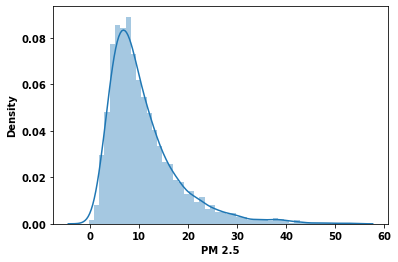

In [5]:
sns.distplot(y)

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
dt = DecisionTreeRegressor(criterion='mse')

In [8]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [9]:
print(f"Coefficient of determination R^2 for train set: {dt.score(X_train,y_train)}")

Coefficient of determination R^2 for train set: 1.0


In [10]:
print(f"Coefficient of determination R^2 for test set: {dt.score(X_test,y_test)}")

Coefficient of determination R^2 for test set: -0.6207172677639323


This is the case of overfitting, it performs very good for train set , and peforms really bad for test set

In [11]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt, X, y, cv=5)

In [12]:
score.mean()

-1.8725005792822533

#### Tree Visualization

In [13]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [14]:
features = list(df.columns[:-1])
features

['AvgTemp',
 'MaxTemp',
 'MinTemp',
 'SeaLevelPressure',
 'AvgHumidity',
 'TotalRainfallSnowmelt',
 'AvgVisibility',
 'AvgWindSpeed',
 'MaxWindSpeed',
 'RainDrizzle',
 'Snow',
 'ThunderStorm',
 'Fog']

In [15]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.211803 to fit



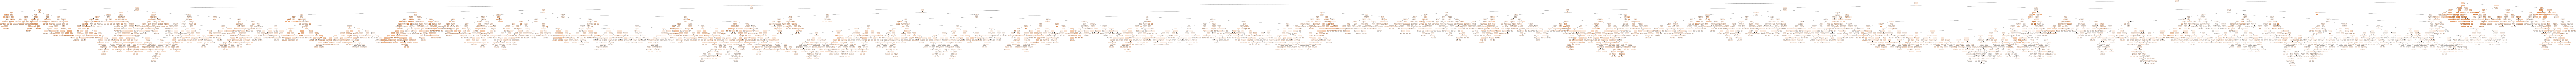

In [16]:
# graph representation of DS
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# text representation of DS
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

[Text(697.5, 951.3000000000001, 'AvgTemp <= 27.55\nmse = 53.005\nsamples = 2711\nvalue = 10.89'),
 Text(348.75, 679.5, 'AvgWindSpeed <= 16.6\nmse = 45.297\nsamples = 2584\nvalue = 10.479'),
 Text(174.375, 407.70000000000005, 'MinTemp <= 3.6\nmse = 51.943\nsamples = 1401\nvalue = 12.014'),
 Text(87.1875, 135.89999999999998, '\n  (...)  \n'),
 Text(261.5625, 135.89999999999998, '\n  (...)  \n'),
 Text(523.125, 407.70000000000005, 'MinTemp <= 2.1\nmse = 31.327\nsamples = 1183\nvalue = 8.66'),
 Text(435.9375, 135.89999999999998, '\n  (...)  \n'),
 Text(610.3125, 135.89999999999998, '\n  (...)  \n'),
 Text(1046.25, 679.5, 'AvgVisibility <= 13.9\nmse = 136.415\nsamples = 127\nvalue = 19.256'),
 Text(871.875, 407.70000000000005, 'AvgHumidity <= 67.5\nmse = 126.067\nsamples = 28\nvalue = 30.108'),
 Text(784.6875, 135.89999999999998, '\n  (...)  \n'),
 Text(959.0625, 135.89999999999998, '\n  (...)  \n'),
 Text(1220.625, 407.70000000000005, 'SeaLevelPressure <= 1018.65\nmse = 96.614\nsamples = 9

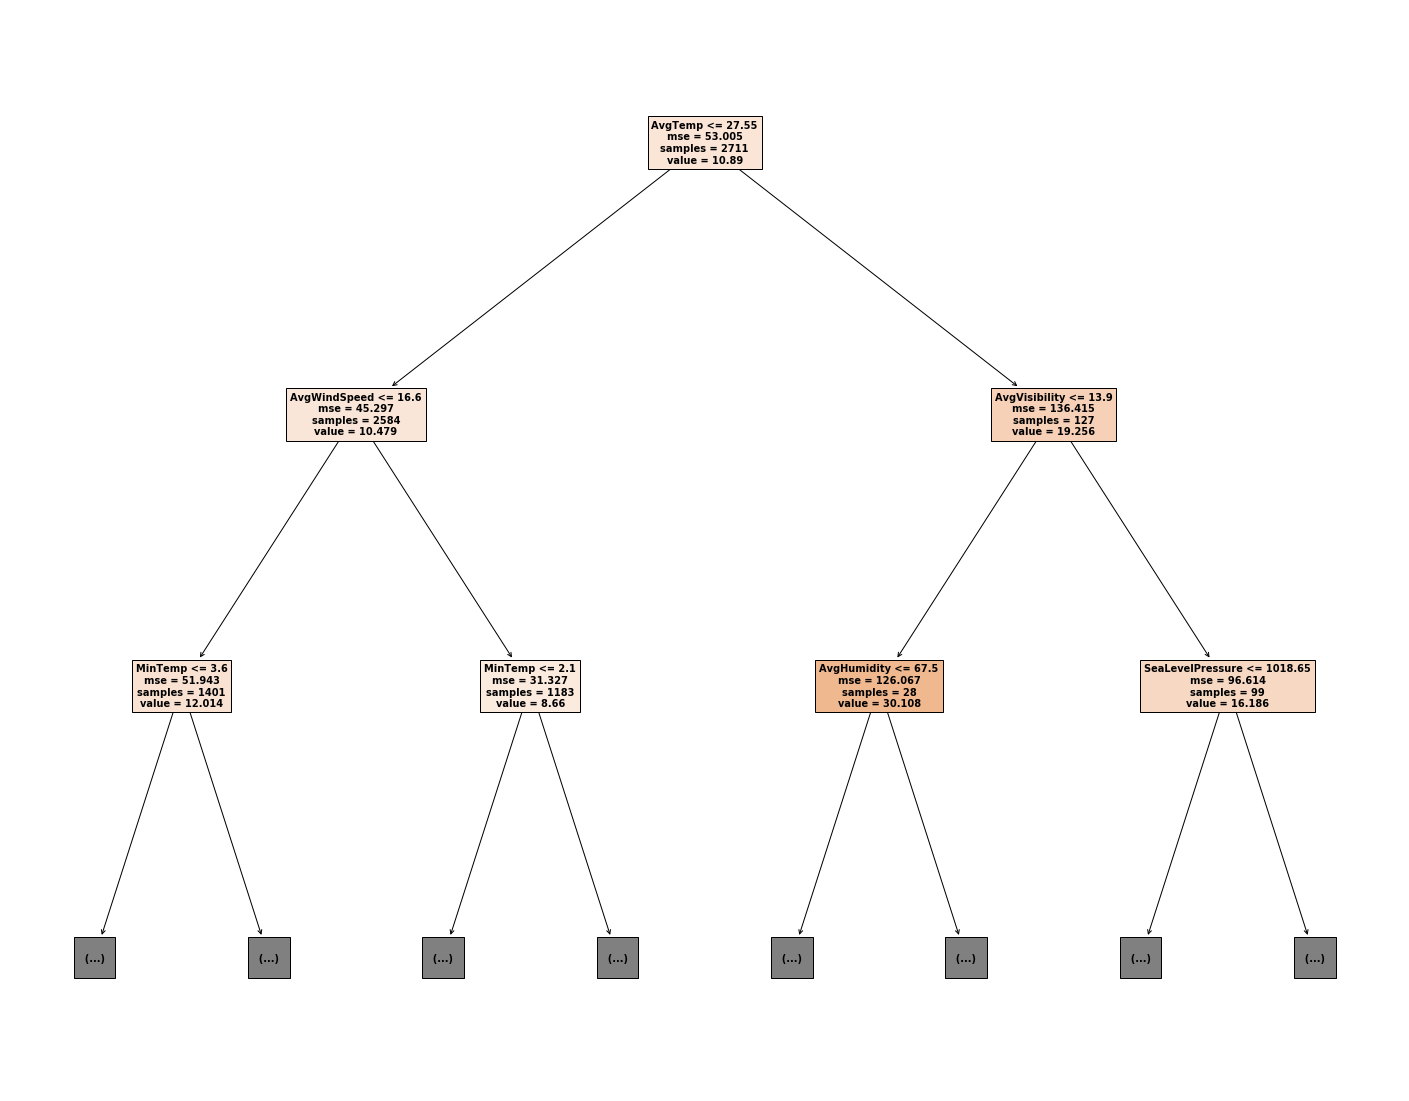

In [25]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt, 
               feature_names=features,  
               class_names=df.columns[-1],
               max_depth=2,
               filled=True)

In [26]:
prediction = dt.predict(X_test)

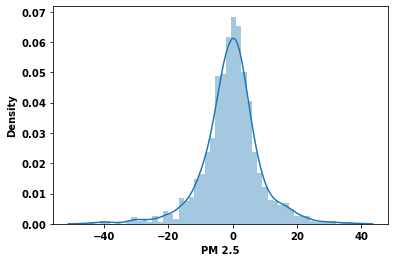

In [29]:
sns.distplot(y_test-prediction)

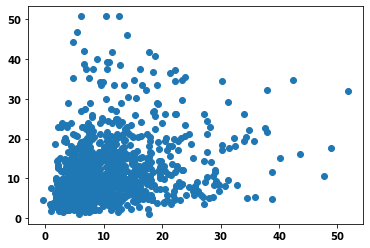

In [30]:
plt.scatter(y_test, prediction)

#### Hyperparameter tuning with Decision Tree Regressor

In [ ]:
DecisionTreeRegressor()

In [31]:
# Hyper Parameter Optimization

params={
 "splitter": ["best","random"] ,
 "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf": [ 1,2,3,4,5 ],
 "min_weight_fraction_leaf": [0.1,0.2,0.3,0.4],
 "max_features": ["auto","log2","sqrt", None],
 "max_leaf_nodes": [None,10,20,30,40,50,60,70]
}

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [38]:
grid_search = GridSearchCV(dt, param_grid=params, scoring="neg_mean_squared_error", n_jobs=-1, cv=10, verbose=3)

In [37]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [39]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 2840 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 4248 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 5912 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 7832 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 10008 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 12440 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 15128 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 18072 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 21272 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 24728 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 28440 task


 Time taken: 0 hours 6 minutes and 5.16 seconds.


In [40]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [58]:
grid_search.best_score_

-47.66056332021092

In [59]:
prediction=grid_search.predict(X_test)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


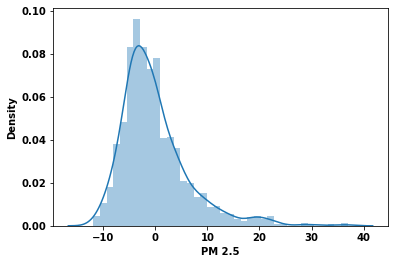

In [60]:
sns.distplot(y_test-prediction)

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 4.768625296854375
MSE: 42.81271383237721
RMSE: 6.5431425043611275


In [ ]:
RandomizedSearchCV()

In [43]:
randomized_search = RandomizedSearchCV(dt, param_distributions=params, scoring="neg_mean_squared_error", n_jobs=-1, cv=10, verbose=3)

In [44]:
start_time = timer(None) # timing starts from this point for "start_time" variable
randomized_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s



 Time taken: 0 hours 0 minutes and 0.46 seconds.


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [45]:
randomized_search.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.2,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 60,
 'max_features': 'log2',
 'max_depth': 12}

In [62]:
randomized_search.best_score_

-49.77047885906636

In [63]:
predictions=randomized_search.predict(X_test)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


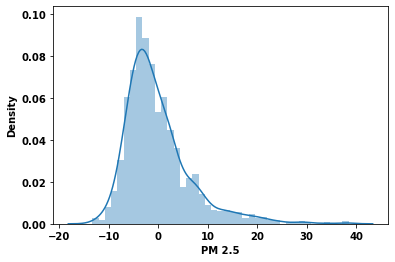

In [64]:
sns.distplot(y_test-predictions)

In [47]:
from sklearn import metrics

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.872153016770619
MSE: 44.38958630787931
RMSE: 6.662551036043125


Grid seach performed a little better

In [67]:
import pickle

In [68]:
file = open("decision_tree_regression_model.pkl", "wb")

pickle.dump(grid_search, file)